In [80]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import CSVLogger
from datetime import datetime
%matplotlib inline

In [81]:
df = pd.read_csv('TSLA.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 7 columns):
Date      441 non-null object
minor     441 non-null object
Close     441 non-null float64
High      441 non-null float64
Low       441 non-null float64
Volume    441 non-null float64
Open      441 non-null float64
dtypes: float64(5), object(2)
memory usage: 24.2+ KB


In [82]:
df.Date = df.Date.astype('datetime64[ns]')

In [83]:
df.drop('minor', axis=1, inplace=True)

In [84]:
df.set_index(df.Date)

,Date,Close,High,Low,Volume,Open
Date,,,,,,
2015-12-31,2015-12-31,240.009995,243.449997,238.369995,2715000.0,238.509995
2016-01-04,2016-01-04,223.410004,231.380005,219.000000,6827100.0,230.720001
2016-01-05,2016-01-05,223.429993,226.889999,220.000000,3186800.0,226.360001
2016-01-06,2016-01-06,219.039993,220.050003,215.979996,3779100.0,220.000000
2016-01-07,2016-01-07,215.649994,218.440002,213.669998,3554300.0,214.190002
2016-01-08,2016-01-08,211.000000,220.440002,210.770004,3628100.0,217.860001
2016-01-11,2016-01-11,207.850006,214.449997,203.000000,4089700.0,214.009995
2016-01-12,2016-01-12,209.970001,213.740005,205.309998,3091900.0,211.600006
2016-01-13,2016-01-13,200.309998,212.649994,200.000000,4126400.0,212.009995


In [85]:
df.drop('Date', axis=1, inplace=True)

In [97]:
features=['Open', 'High', 'Low', 'Volume','Close']

In [86]:
df = df[['Open', 'High', 'Low', 'Volume','Close']]

In [87]:
# Using the next day 'Close' price as today label (prediction for next day)
df['Y'] = df['Close'].shift(-1)

In [88]:
df.head(10)

,Open,High,Low,Volume,Close,Y
0,238.509995,243.449997,238.369995,2715000.0,240.009995,223.410004
1,230.720001,231.380005,219.000000,6827100.0,223.410004,223.429993
2,226.360001,226.889999,220.000000,3186800.0,223.429993,219.039993
3,220.000000,220.050003,215.979996,3779100.0,219.039993,215.649994
4,214.190002,218.440002,213.669998,3554300.0,215.649994,211.000000
5,217.860001,220.440002,210.770004,3628100.0,211.000000,207.850006
6,214.009995,214.449997,203.000000,4089700.0,207.850006,209.970001
7,211.600006,213.740005,205.309998,3091900.0,209.970001,200.309998
8,212.009995,212.649994,200.000000,4126400.0,200.309998,206.179993
9,202.210007,210.000000,193.380005,6490700.0,206.179993,204.990005


In [89]:
df.shape

(441, 6)

In [90]:
df = df[:-1]

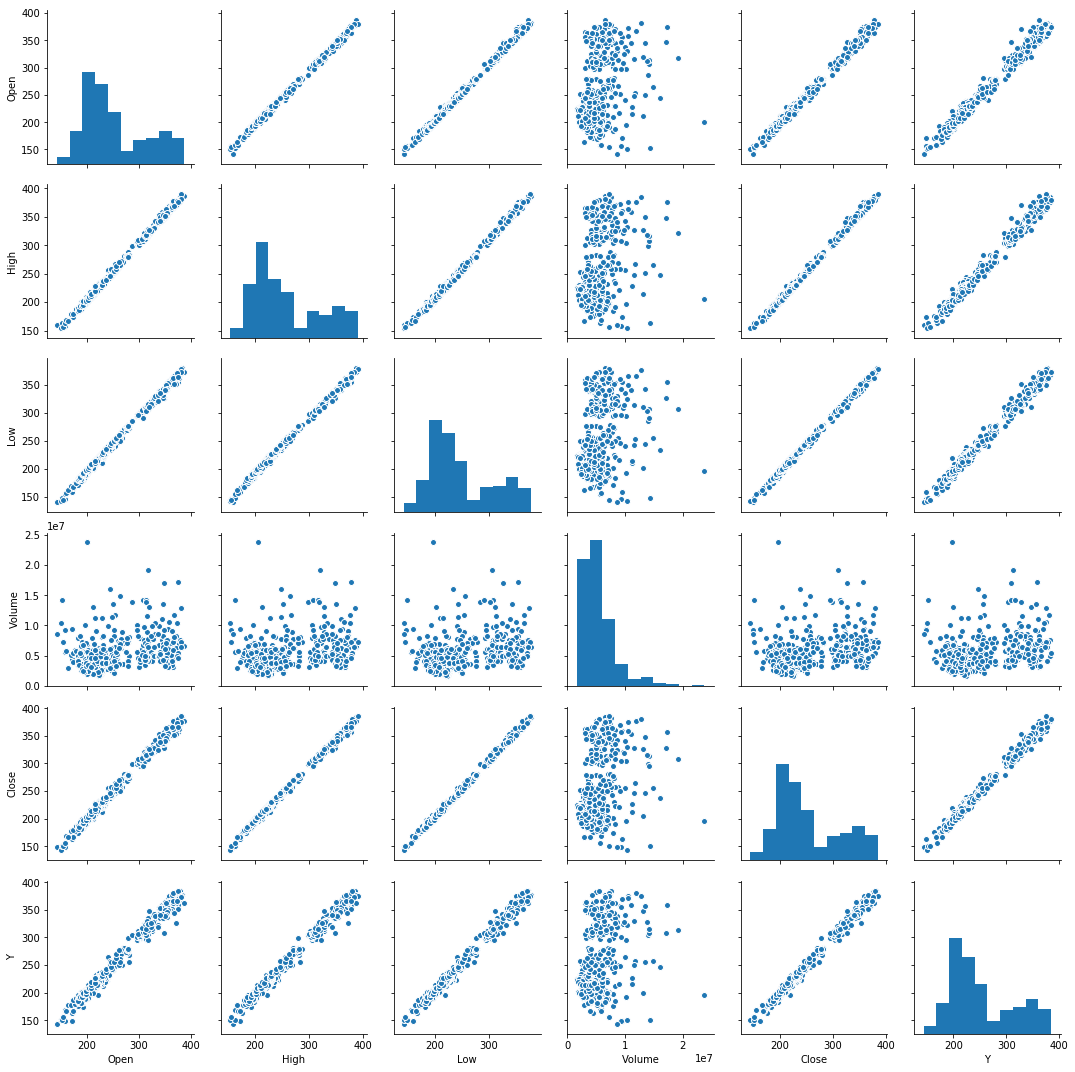

In [91]:
sns.pairplot(df)

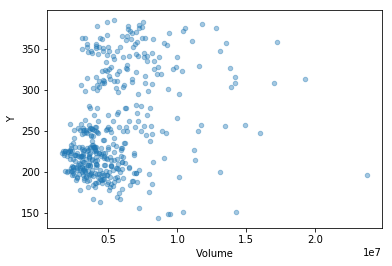

In [94]:
df.plot(kind='scatter', x='Volume', y='Y', alpha=0.4)

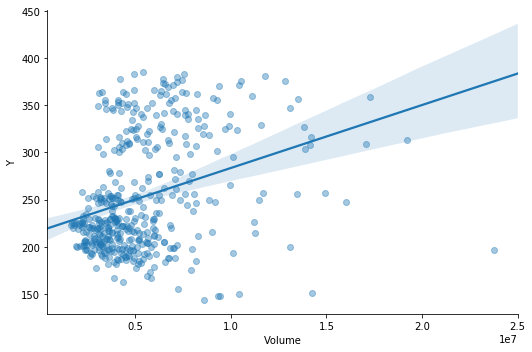

In [96]:
# Seaborn scatter plot with regression line
sns.lmplot(x='Volume', y='Y', data=df, aspect=1.5, scatter_kws={'alpha':0.4})

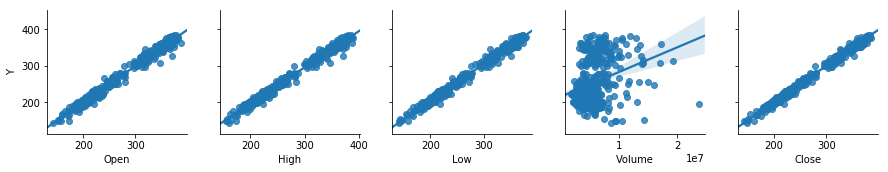

In [98]:
sns.pairplot(df, x_vars=features, y_vars='Y', kind='reg')

In [106]:
df.corr()

,Open,High,Low,Volume,Close,Y
Open,1.000000,0.998602,0.998148,0.319079,0.996077,0.990230
High,0.998602,1.000000,0.998248,0.334048,0.998311,0.992503
Low,0.998148,0.998248,1.000000,0.298727,0.998538,0.993048
Volume,0.319079,0.334048,0.298727,1.000000,0.314009,0.318063
Close,0.996077,0.998311,0.998538,0.314009,1.000000,0.994988
Y,0.990230,0.992503,0.993048,0.318063,0.994988,1.000000


In [113]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression


# create X and y
X = df[features]
y = df.Y

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print(linreg.intercept_)
print(features)
print(linreg.coef_)

1.45204121525
['Open', 'High', 'Low', 'Volume', 'Close']
[  2.37949490e-01  -6.05671662e-01  -7.57859321e-02   3.61749855e-07
   1.43885302e+00]


In [12]:
df.tail(3)

,Open,High,Low,Volume,Close,NextClose
437,350.929993,351.23999,340.899994,7156300.0,345.250000,340.970001
438,349.899994,351.48999,340.500000,6060300.0,340.970001,339.600006
439,339.880005,342.75000,335.399994,5319600.0,339.600006,341.100006


In [13]:
data = df.values

In [14]:
data[:3]

array([[  2.38509995e+02,   2.43449997e+02,   2.38369995e+02,
          2.71500000e+06,   2.40009995e+02,   2.23410004e+02],
       [  2.30720001e+02,   2.31380005e+02,   2.19000000e+02,
          6.82710000e+06,   2.23410004e+02,   2.23429993e+02],
       [  2.26360001e+02,   2.26889999e+02,   2.20000000e+02,
          3.18680000e+06,   2.23429993e+02,   2.19039993e+02]])

In [15]:
data.shape

(440, 6)

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data)

In [17]:
dataset = scaled.copy()

In [18]:
# Split data into train (80%) and test (20%) dataset 
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(dataset), len(train), len(test))
print(dataset.shape, train.shape, test.shape)

440 352 88
(440, 6) (352, 6) (88, 6)


In [19]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X)
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

[[ 0.39362438  0.37708831  0.40839274  0.04779716  0.39920439]
 [ 0.36174651  0.32564784  0.32710867  0.23400912  0.33041895]
 [ 0.34390472  0.30651212  0.33130506  0.06916211  0.33050178]
 ..., 
 [ 0.69763058  0.67933858  0.69555175  0.12089445  0.69067255]
 [ 0.68805495  0.66382552  0.68161983  0.12040538  0.66377983]
 [ 0.67189101  0.66497617  0.68967683  0.15277885  0.69013385]]
(352, 5) (352,)
(88, 5) (88,)


In [20]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(352, 1, 5) (352,) (88, 1, 5) (88,)


In [21]:
train_y = train_y.reshape(-1,1)
test_y = test_y.reshape(-1,1)

In [51]:
batchsize=5
epoch=60
optimizer='adam'
neurons=16
now = datetime.now().strftime('%Y%m%d_%H%M')
outfile='logs/loss_%s_batchsize_%s_epoch_%s_neurons_%s_optimizer_%s_log.csv' % (now, batchsize, epoch, neurons, optimizer)

In [54]:
#def create_model(_train_X=train_X, _train_y=train_y, _neurons=4, _batchsize=1, _optimizer='adam', _epoch=60, _outfile='loss_output.log' ):
# create and fit the LSTM network
csv_logger = CSVLogger(outfile)
model = Sequential()
model.add(LSTM(neurons, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=optimizer)
model.fit(train_X, train_y, epochs=epoch, batch_size=batchsize, verbose=0 ,shuffle=False, callbacks=[csv_logger] )
 
    

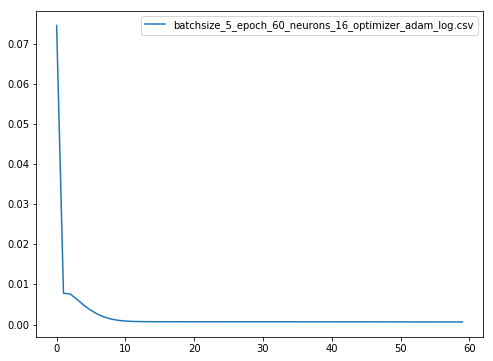

In [55]:
rmse_loss= pd.read_csv(outfile)
label="_".join(outfile.split('_')[3:])
plt.figure(figsize=(8,6))
plt.plot(rmse_loss.epoch, rmse_loss.loss, label=label)
plt.legend()
plt.show()

In [56]:
# make predictions
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)

In [57]:
print(test_X.shape, testPredict.shape)

(88, 1, 5) (88, 1)


Sample shape

train_X.shape trainPredict.shape

(352, 1, 5)    (352, 1)

test_X.shape, testPredict.shape

(88, 1, 5) (88, 1)

In [58]:
train_X.reshape(len(train_X),train_X.shape[2]).shape

(352, 5)

In [59]:
def reshape_to_orig(x,y):
    '''
    Merging x and y into its original series shape.
    
    Reshape x from (rows_count,1,cols_count) => (rows_count,cols_count) 
    and concat with y in the shape (rows_count,1)
    e.g (88, 1, 5) + (88, 1) = (88,6)
    
    '''
    return np.hstack((x.reshape(len(x),x.shape[2]), y))

In [60]:
#trainPredict2 = np.hstack((train_X[:].reshape(len(train_X),train_X.shape[2]), trainPredict))
trainPredict2 = reshape_to_orig(train_X,trainPredict)
trainY2 = reshape_to_orig(train_X,train_y)
testPredict2 = reshape_to_orig(test_X,testPredict)
testY2 = reshape_to_orig(test_X,test_y)
print(trainPredict2.shape, trainY2.shape)
print(testPredict2.shape, testY2.shape)
print(trainPredict2[:3])
trainPredict[:3,-1]

(352, 6) (352, 6)
(88, 6) (88, 6)
[[ 0.39362438  0.37708831  0.40839274  0.04779716  0.39920439  0.41614944]
 [ 0.36174651  0.32564784  0.32710867  0.23400912  0.33041895  0.3552537 ]
 [ 0.34390472  0.30651212  0.33130506  0.06916211  0.33050178  0.34862447]]


array([ 0.41614944,  0.3552537 ,  0.34862447], dtype=float32)

In [61]:
# Transform back to the original data sets
trainPredict_orig = scaler.inverse_transform(trainPredict2)
trainY_orig = scaler.inverse_transform(trainY2)
testPredict_orig = scaler.inverse_transform(testPredict2)
testY_orig = scaler.inverse_transform(testY2)


# calculate root mean squared error
trainScore = sqrt(mean_squared_error(trainY_orig[:,-1], trainPredict_orig[:,-1]))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = sqrt(mean_squared_error(testY_orig[:,-1], testPredict_orig[:,-1]))
print('Test Score: %.3f RMSE' % (testScore))


Train Score: 6.819 RMSE
Test Score: 9.536 RMSE


In [62]:
print(trainPredict_orig[:3])
trainPredict_orig[:3,-1]

[[  2.38509995e+02   2.43449997e+02   2.38369995e+02   2.71500000e+06
    2.40009995e+02   2.44099343e+02]
 [  2.30720001e+02   2.31380005e+02   2.19000000e+02   6.82710000e+06
    2.23410004e+02   2.29403373e+02]
 [  2.26360001e+02   2.26889999e+02   2.20000000e+02   3.18680000e+06
    2.23429993e+02   2.27803542e+02]]


array([ 244.09934257,  229.40337327,  227.80354152])

In [68]:
data.shape, trainPredict_orig.shape[0], testPredict_orig.shape[0]

((440, 6), 352, 88)

In [73]:
data[:-1]
#print(train_size )

array([[  2.38509995e+02,   2.43449997e+02,   2.38369995e+02,
          2.71500000e+06,   2.40009995e+02,   2.23410004e+02],
       [  2.30720001e+02,   2.31380005e+02,   2.19000000e+02,
          6.82710000e+06,   2.23410004e+02,   2.23429993e+02],
       [  2.26360001e+02,   2.26889999e+02,   2.20000000e+02,
          3.18680000e+06,   2.23429993e+02,   2.19039993e+02],
       ..., 
       [  3.53149994e+02,   3.57470001e+02,   3.42880005e+02,
          7.60590000e+06,   3.44989990e+02,   3.45250000e+02],
       [  3.50929993e+02,   3.51239990e+02,   3.40899994e+02,
          7.15630000e+06,   3.45250000e+02,   3.40970001e+02],
       [  3.49899994e+02,   3.51489990e+02,   3.40500000e+02,
          6.06030000e+06,   3.40970001e+02,   3.39600006e+02]])

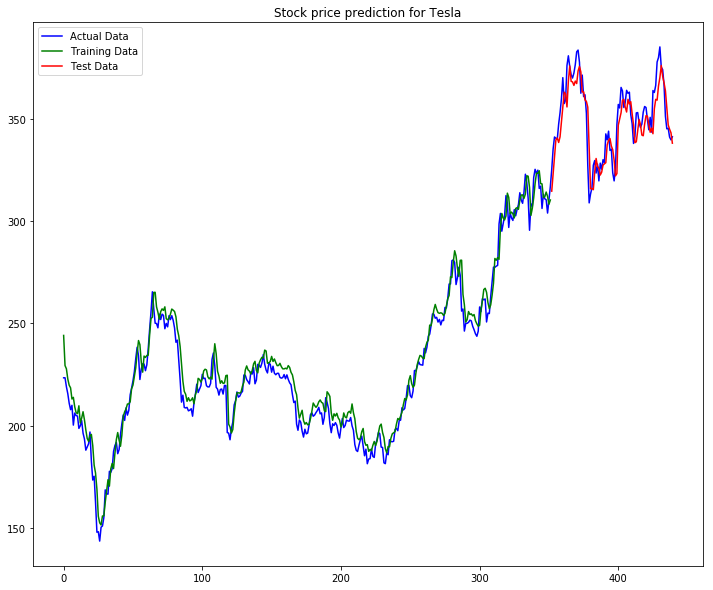

In [74]:
data_plot = data[:,-1].reshape(-1,1)
#print(data_plot.shape)
#print(data_plot[:3])

train_plot = np.empty_like(data_plot)
train_plot[:,:] = np.nan
#The prediction price is the last col
#train_plot[1:train_size+1,:] = trainPredict_orig[:,-1].reshape(-1,1)
train_plot[:train_size,:] = trainPredict_orig[:,-1].reshape(-1,1)
#train[look_back:len(trainPredict4)+look_back, :] = trainPredict4
#print(train_plot.shape)
#print(train_plot[:3])

test_plot = np.empty_like(data_plot)
# The Test prediction contain the prediction data for next day 
# hence, we add 1 more empty row to graph it 
#empty_row = np.array([[np.nan]])
#print(test_plot.shape, empty_row.shape)
#test_plot = np.concatenate((test_plot,empty_row), axis=0)
test_plot[:,:] = np.nan
#print('Test')
#print(len(test_plot) - (train_size+1))
#print(len(testPredict))
test_plot[train_size:len(test_plot),:] = testPredict_orig[:,-1].reshape(-1,1)
#print(test_plot.shape)
#print(test_plot[:-3])

plt.figure(figsize=(12,10))
plt.plot(data[:,-1], color='blue', label='Actual Data')
plt.plot(train_plot[:,-1], color='green', label='Training Data')
plt.plot(test_plot[:,-1], color='red', label='Test Data')
plt.title('Stock price prediction for Tesla')
plt.legend()
plt.show()

In [75]:
data[-10:].shape

(10, 6)

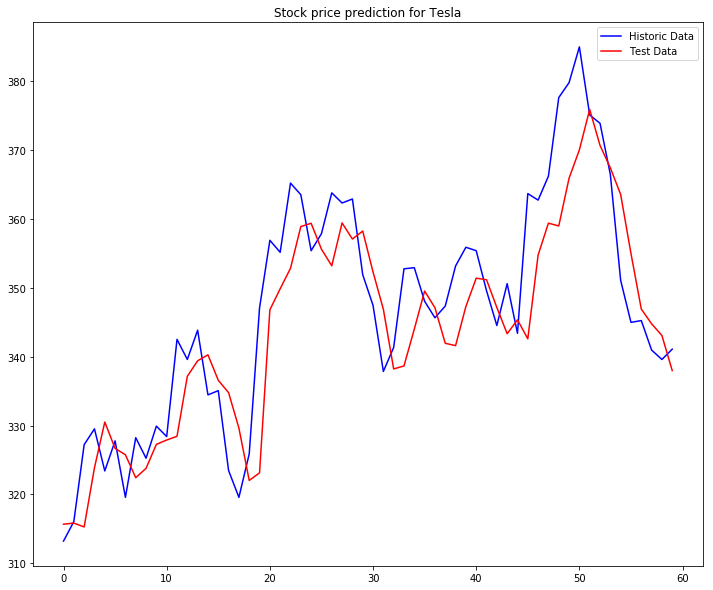

In [77]:
plt.figure(figsize=(12,10))
plt.plot(data[-60:,-1], color='blue', label='Historic Data')
plt.plot(test_plot[-60:,-1], color='red', label='Test Data')
plt.title('Stock price prediction for Tesla')
plt.legend()
plt.show()
